<a href="https://colab.research.google.com/github/SUBHAM830/Fake-News-Detection/blob/main/Fake_News_Detection_G22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let us import the required libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

About the Dataset:

1.id: unique id for a news article

2.title: the title of a news article

3.author: author of the news article

4.text: the text of the article; could be incomplete

5.label: a label that marks whether the news article is real or fake:

1 For Fake News 

0 For True News


In [ ]:
#mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Now Loading the dataset
DataSet=pd.read_csv('/content/drive/My Drive/FakeNewsDetection/Dataset/train.csv')

In [ ]:
# Let us check the shape of the dataset
DataSet.shape

(20800, 5)

In [ ]:
#Let us check first 10 records of the dataset
DataSet.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


Data Pre-processing

In [ ]:
#descriptive statistics
DataSet.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
#Now check the missing values
DataSet.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#Now let us replace the null values with empty string
DataSet=DataSet.fillna('')

In [ ]:
#Now let us check null value again 
DataSet.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
# merging the author name and news title
DataSet['content'] =DataSet['author']+' '+DataSet['title']

In [ ]:
print(DataSet['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


Now Performing Stemming

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
DataSet['content'] = DataSet['content'].apply(stemming)

In [ ]:
print(DataSet['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = DataSet['content'].values
Y = DataSet['label'].values

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

Split the dataset in Train Test form

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

Appliying Algoes
1. Logistic Regression

In [ ]:
LR = LogisticRegression()

In [ ]:
# Fit the model
LR.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9850961538461539


In [ ]:
# accuracy score on the test data
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9743589743589743


2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction = DT.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [ ]:
# accuracy score on the test data
X_test_prediction = DT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9932692307692308


3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction = GB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9657967032967033


In [ ]:
# accuracy score on the test data
X_test_prediction = GB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9628205128205128


4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction = RF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [ ]:
# accuracy score on the test data
X_test_prediction = RF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9931089743589744


5. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
NB = BernoulliNB()
NB.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
# accuracy score on the training data
X_train_prediction = NB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9896978021978022


In [ ]:
# accuracy score on the test data
X_test_prediction = NB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9825320512820512


6. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
SV = SVC(kernel='linear')
SV.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = SV.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9974587912087912


In [ ]:
# accuracy score on the test data
X_test_prediction = SV.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9911858974358975


7. K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KN = KNeighborsClassifier(n_neighbors=2)
KN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# accuracy score on the training data
X_train_prediction = KN.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9993818681318681


In [ ]:
# accuracy score on the test data
X_test_prediction = KN.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.5820512820512821


8. XG-Boosting Classifier

In [ ]:
# Fitting XGBoost to the training data
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, Y_train)
   

XGBClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction = XGB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9587912087912088


In [ ]:
# accuracy score on the test data
X_test_prediction = XGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.955448717948718


Now Comparing The Algoes In Other Parameters

In [ ]:
# Define a function to compute Precision, Recall and F1 score

from sklearn.metrics import confusion_matrix

def get_pre_rec_f1(model_name, model,x_test,y_test):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    return [model_name, precision, recall, F1]


In [ ]:
   # Logistic Regression model performance on validation data:
col_1 = get_pre_rec_f1("Logistic Regression", LR, X_test, Y_test)

# Decision Tree Classifer model performance on validation data:
col_2 = get_pre_rec_f1("Decision Tree Classifer", DT, X_test, Y_test)

# Gradient Boosting Classifier model performance on validation data:
col_3 = get_pre_rec_f1(" Gradient Boosting Classifier",GB, X_test, Y_test)



# Random Forest Classifier model performance on validation data:
col_4 = get_pre_rec_f1("Random Forest Classifier",RF, X_test, Y_test)

# Naive Bayes Classifier model performance on validation data:
col_5 = get_pre_rec_f1("Naive Bayes Classifier",NB, X_test, Y_test)

# Support Vector Machine model performance on validation data:
col_6 = get_pre_rec_f1("Support Vector Machine",SV, X_test, Y_test)

# K-Nearest Neighbour model performance on validation data:
col_7 = get_pre_rec_f1("K-Nearest Neighbour",KN, X_test, Y_test)

# XG Boosting Classifier model performance on validation data:
col_8 = get_pre_rec_f1("XG Boosting Classifier",XGB, X_test, Y_test)

result = []
result.append(col_1)
result.append(col_2)
result.append(col_3)
result.append(col_4)
result.append(col_5)
result.append(col_6)
result.append(col_7)
result.append(col_8)


pd.DataFrame(result, columns = ["Model", "Precision", "Recall", "F1"]) 
    


,Model,Precision,Recall,F1
0,Logistic Regression,0.957690,0.992638,0.974851
1,Decision Tree Classifer,0.993594,0.992958,0.993276
2,Gradient Boosting Classifier,0.933453,0.996799,0.964087
3,Random Forest Classifier,0.989825,0.996479,0.993141
4,Naive Bayes Classifier,0.982091,0.983035,0.982563
5,Support Vector Machine,0.989162,0.993278,0.991215
6,K-Nearest Neighbour,0.545073,0.998720,0.705244
7,XG Boosting Classifier,0.920757,0.996799,0.957270


In [ ]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

Text(0.5, 1.0, 'ROC/AUC of 8 ML models')

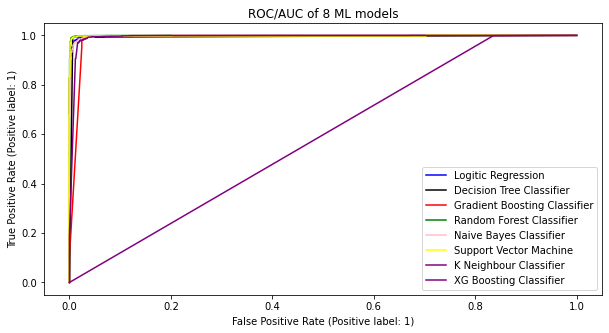

In [ ]:
# Plot ROC_AUC curve of 8 ML models

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(LR, X_test, Y_test,ax=ax, color="blue",label='Logitic Regression')
plot_roc_curve(DT, X_test, Y_test,ax=ax, color="black",label='Decision Tree Classifier')
plot_roc_curve(GB, X_test, Y_test,ax=ax, color="red",label='Gradient Boosting Classifier')
plot_roc_curve(RF, X_test, Y_test,ax=ax, color="green",label='Random Forest Classifier')
plot_roc_curve(NB, X_test, Y_test,ax=ax, color="pink",label='Naive Bayes Classifier')
plot_roc_curve(SV, X_test, Y_test,ax=ax, color="yellow",label='Support Vector Machine')
plot_roc_curve(KN, X_test, Y_test,ax=ax, color="purple",label='K Neighbour Classifier')
plot_roc_curve(XGB, X_test, Y_test,ax=ax, color="purple",label='XG Boosting Classifier')
plt.title('ROC/AUC of 8 ML models')


Now Performming Deep Learning Algoes

Some Preprocessing for DL

In [ ]:
Y = DataSet['label'].values

In [ ]:
import gensim
#it is a python library which is used for represent 

In [ ]:
X=[d.split() for d in DataSet['content'].tolist()]

In [ ]:
print(X[0])

['darrel', 'lucu', 'hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet']


In [ ]:
# Build w2c model
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,size=DIM,window=10,min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

17146

In [ ]:
# for Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
#convert into tokens
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X=tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'new': 1,
 'time': 2,
 'york': 3,
 'trump': 4,
 'breitbart': 5,
 'clinton': 6,
 'hillari': 7,
 'donald': 8,
 'news': 9,
 'elect': 10,
 'u': 11,
 'say': 12,
 'obama': 13,
 'michael': 14,
 'john': 15,
 'russia': 16,
 'com': 17,
 'us': 18,
 'video': 19,
 'presid': 20,
 'war': 21,
 'state': 22,
 'world': 23,
 'vote': 24,
 'america': 25,
 'report': 26,
 'american': 27,
 'day': 28,
 'year': 29,
 'attack': 30,
 'fbi': 31,
 'email': 32,
 'comment': 33,
 'call': 34,
 'admin': 35,
 'hous': 36,
 'get': 37,
 'media': 38,
 'kill': 39,
 'white': 40,
 'blogger': 41,
 'norepli': 42,
 'david': 43,
 'polic': 44,
 'bill': 45,
 'daniel': 46,
 'campaign': 47,
 'key': 48,
 'plan': 49,
 'support': 50,
 'protest': 51,
 'democrat': 52,
 'charli': 53,
 'one': 54,
 'de': 55,
 'make': 56,
 'russian': 57,
 'first': 58,
 'e': 59,
 'black': 60,
 'syria': 61,
 'show': 62,
 'win': 63,
 'pam': 64,
 'robert': 65,
 'jame': 66,
 'right': 67,
 'man': 68,
 'mike': 69,
 'break': 70,
 'brief': 71,
 'anti': 72,
 'take': 73,
 

In [ ]:
nos=np.array([len(X) for x in X])
len(nos[nos>1000])

20800

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [ ]:
len(X[101])

1000

In [ ]:
vocab_size=len(tokenizer.word_index) +1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))

    for word, i in vocab.items():
      weight_matrix[i]=model.wv[word]

    return weight_matrix

In [ ]:
embedding_vectors=get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(17147, 100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

1. LSTM (Long Short Term Mermory) Algorithm

In [ ]:
# build model
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         1714700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,832,077
Trainable params: 117,377
Non-trainable params: 1,714,700
_________________________________________________________________


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [ ]:
model.fit(X_train,Y_train,validation_split=0.3,epochs=6)

Epoch 1/6
342/342 [==============================] - 414s 1s/step - loss: 0.2426 - acc: 0.8976 - val_loss: 0.1619 - val_acc: 0.9393
Epoch 2/6
342/342 [==============================] - 460s 1s/step - loss: 0.1618 - acc: 0.9368 - val_loss: 0.1539 - val_acc: 0.9359
Epoch 3/6
342/342 [==============================] - 444s 1s/step - loss: 0.1372 - acc: 0.9465 - val_loss: 0.1358 - val_acc: 0.9447
Epoch 4/6
342/342 [==============================] - 374s 1s/step - loss: 0.1299 - acc: 0.9506 - val_loss: 0.1266 - val_acc: 0.9513
Epoch 5/6
342/342 [==============================] - 374s 1s/step - loss: 0.1130 - acc: 0.9582 - val_loss: 0.1238 - val_acc: 0.9489
Epoch 6/6
342/342 [==============================] - 372s 1s/step - loss: 0.1098 - acc: 0.9567 - val_loss: 0.0963 - val_acc: 0.9665


In [ ]:
Y_pred=(model.predict(X_test) >= 0.5).astype(int)

In [ ]:
#check accuracy
accuracy_score(Y_test,Y_pred)

0.9663461538461539

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2601
           1       0.95      0.99      0.97      2599

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[2461  140]
 [  35 2564]]


In [ ]:
# Calculate Precision
precision=(2461)/(2461+35)
print("Precision = ",precision)

Precision =  0.9859775641025641


In [ ]:
# Calculate Recall
recall=(2461)/(35+2564)
print("Recall = ",recall)

Recall =  0.9469026548672567


In [ ]:
#Calculate F1-score
F1= 2 * (precision * recall) / (precision + recall)
print("F1-Score = ",F1)

F1-Score =  0.9660451422963688


2. ANN (Artifical Neural Networks) Algorithm

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [ ]:
ANN=MLPRegressor(hidden_layer_sizes=(64,64,64),activation='relu',alpha=0.0001,batch_size='auto',learning_rate='constant',learning_rate_init=0.001,
                 random_state=1,max_iter=2000).fit(X_train,Y_train)

In [ ]:
Y_pred=(ANN.predict(X_test) >= 0.5).astype(int)

In [ ]:
#check accuracy
accuracy_score(Y_test,Y_pred)

0.6176923076923077

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.32      0.45      2586
           1       0.58      0.92      0.71      2614

    accuracy                           0.62      5200
   macro avg       0.68      0.62      0.58      5200
weighted avg       0.68      0.62      0.58      5200



In [ ]:
# Comfusion Matrix of ANN
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[ 816 1770]
 [ 218 2396]]


In [ ]:
# Calculate Precision
precision=(816)/(218+816)
print("Precision = ",precision)

Precision =  0.7891682785299806


In [ ]:
# Calculate Recall
recall=(816)/(218+2396)
print("Recall = ",recall)

Recall =  0.31216526396327465


In [ ]:
#Calculate F1-score
F1= 2 * (precision * recall) / (precision + recall)
print("F1-Score = ",F1)

F1-Score =  0.4473684210526315


Graph of Precision,Recall,F1-score for ML and DL algoes

In [1]:
import matplotlib.pyplot as plt

In [2]:
x=['LR','DT','GB','RF','NB','SVM','KNN','XB','LSTM','ANN']

y1=[0.957690,0.993594,0.933453,0.989825,0.982091,0.989162,0.545073,0.920757,0.985977,0.789168]
y2=[0.992638,0.992958,0.996799,0.996479,0.983035,0.993278,0.998720,0.996799,0.946902,0.312165]
y3=[0.974851,0.993276,0.964087,0.993141,0.982563,0.991215,0.705244,0.957270,0.966045,0.447368]

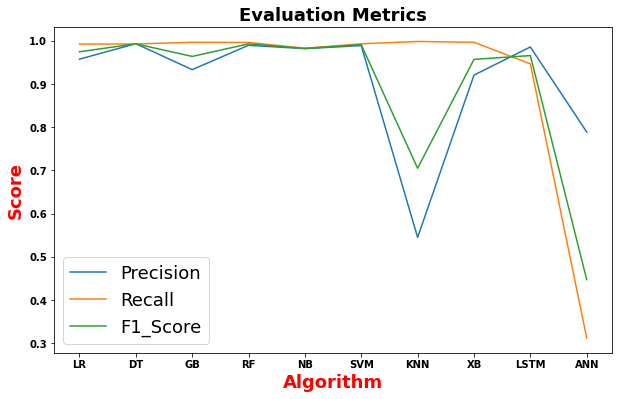

In [4]:

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot()
ax.set_xlabel('Algorithm',fontsize=18,fontweight='bold')
ax.set_ylabel('Score',fontsize=18,fontweight='bold')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.set_title('Evaluation Metrics',fontsize=18,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Precision","Recall","F1_Score"],fontsize=18)
plt.show()

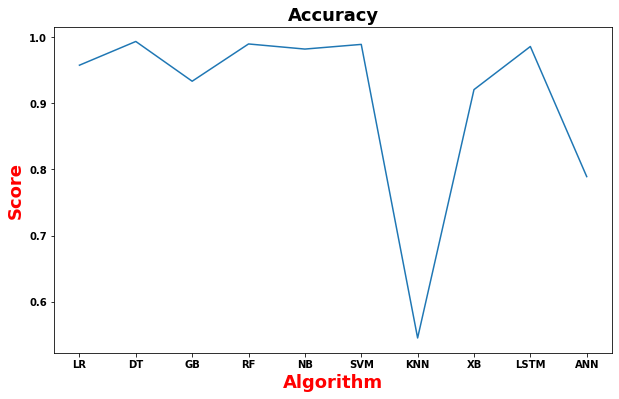

In [5]:
y4=[97.90,99.20,96.75,99.27,98.29,99.13,58.70,95.31,96.63,61.76]

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot()
ax.set_xlabel('Algorithm',fontsize=18,fontweight='bold')
ax.set_ylabel('Score',fontsize=18,fontweight='bold')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.set_title('Accuracy',fontsize=18,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.plot(x,y1)


plt.show()